# Task 1: Setup and DataFrame Creation

In [44]:
import pandas as pd
#Install Pandas (if not already installed).
#Import Pandas and any other necessary libraries.

In [45]:
#Create a DataFrame from a dictionary and from a list of dictionaries.
print("Creating a dataframe from a dictionary")
# Sample dictionary
data = {
    'Name': ['Ram', 'Sita', 'Hari'],
    'Age': [25, 30, 35],
    'City': ['Pkr', 'Ktm', 'Btl']
}
# Create DataFrame
df = pd.DataFrame(data)
# Display the DataFrame
print(df)

Creating a dataframe from a dictionary
   Name  Age City
0   Ram   25  Pkr
1  Sita   30  Ktm
2  Hari   35  Btl


In [46]:
print("Creating a dataframe from a  list of dictionaries")
import pandas as pd
# Sample list of dictionaries
data = [
    {'Name': 'Roshan', 'Age': 25, 'City': 'Nplg'},
    {'Name': 'Binita', 'Age': 30, 'City': 'Ktm'},
    {'Name': 'Cetal', 'Age': 35, 'City': 'Ctwn'}
]
# Create DataFrame
df = pd.DataFrame(data)
# Display the DataFrame
print(df)


Creating a dataframe from a  list of dictionaries
     Name  Age  City
0  Roshan   25  Nplg
1  Binita   30   Ktm
2   Cetal   35  Ctwn


In [47]:
#Load a dataset from a CSV file that is provide called messed_dataset.csv
df = pd.read_csv('messed_dataset.csv')
print(df.head())

                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                  NaN        China       NaN   
2      Jessica Reyes  34.0                  NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0                  NaN      Ecuador  24665.13   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-06-19  


# Task 2: Viewing and Inspecting Data

In [48]:
# Display the first and last few rows of the DataFrame. 
print("First 7 rows of dataframe")
print(df.head(7))


First 7 rows of dataframe
                Name   Age                     Email      Country    Salary  \
0            invalid  59.0       ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                       NaN        China       NaN   
2      Jessica Reyes  34.0                       NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0         ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0                       NaN      Ecuador  24665.13   
5   Jonathan Holland  26.0  mayercaitlin@example.org     Cameroon  25660.99   
6        James Clark  80.0       ynguyen@example.net          NaN  61345.33   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-06-19  
5    2023-05-01  
6           NaN  


In [49]:
print("Last 7 rows of dataframe")
print(df.tail(7))

Last 7 rows of dataframe
                  Name   Age                     Email            Country  \
93       Alicia Miller  59.0      thomas45@example.net         Mauritania   
94        Cody Jackson  48.0    jamieayers@example.net         Luxembourg   
95    Garrett Davidson  56.0        gjames@example.com    Solomon Islands   
96      Elizabeth Ross  52.0  richardlewis@example.net  Equatorial Guinea   
97                 NaN  72.0       brian50@example.com            Somalia   
98      Patricia Singh  65.0      lramirez@example.org             Greece   
99  Christopher Stokes  42.0                       NaN       South Africa   

      Salary DateOfJoining  
93  52834.29    2020-06-03  
94  55583.62    2021-05-23  
95  86227.88           NaN  
96  29992.69    2020-04-08  
97  90628.22    2020-04-11  
98  85290.44    2020-03-18  
99  20289.17    2021-09-23  


In [50]:
#Get a summary of the DataFrame, including basic statistics and data types.
print("STATISTICS IS")
print(df.describe())

STATISTICS IS
           Name   Age                Email Country   Salary DateOfJoining
count        89    97                   80      86       94            79
unique       85    53                   80      76       93            79
top     invalid  76.0  ycastro@example.org  Greece  invalid    2022-09-29
freq          5     6                    1       2        2             1


In [51]:
print("Information is")
print(df.info())


Information is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           89 non-null     object
 1   Age            97 non-null     object
 2   Email          80 non-null     object
 3   Country        86 non-null     object
 4   Salary         94 non-null     object
 5   DateOfJoining  79 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB
None


In [52]:
#Display the shape and column names of the DataFrame.
print("Shape of DataFrame")
print(df.shape)
print("List of column name")
print(df.columns)


Shape of DataFrame
(100, 6)
List of column name
Index(['Name', 'Age', 'Email', 'Country', 'Salary', 'DateOfJoining'], dtype='object')


# Task 3: Selection and Indexing

In [53]:
# Select a single column and multiple columns.
print("A column is")
print(df['Name'])

A column is
0                invalid
1        David Jefferson
2          Jessica Reyes
3      Kenneth Macdonald
4            Julie Horne
             ...        
95      Garrett Davidson
96        Elizabeth Ross
97                   NaN
98        Patricia Singh
99    Christopher Stokes
Name: Name, Length: 100, dtype: object


In [54]:
print ("Multiple Colums")
print(df[['Name','Email']])

Multiple Colums
                  Name                     Email
0              invalid       ycastro@example.org
1      David Jefferson                       NaN
2        Jessica Reyes                       NaN
3    Kenneth Macdonald         ewolf@example.com
4          Julie Horne                       NaN
..                 ...                       ...
95    Garrett Davidson        gjames@example.com
96      Elizabeth Ross  richardlewis@example.net
97                 NaN       brian50@example.com
98      Patricia Singh      lramirez@example.org
99  Christopher Stokes                       NaN

[100 rows x 2 columns]


In [55]:
#Select rows by index and by label.
print ("SELECT ROWS BY INDEX")
print (df.iloc[0:4])
print ("SELECT ROWS BY LABEL")
df.loc[2]

SELECT ROWS BY INDEX
                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                  NaN        China       NaN   
2      Jessica Reyes  34.0                  NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
SELECT ROWS BY LABEL


Name             Jessica Reyes
Age                       34.0
Email                      NaN
Country                    NaN
Salary                60511.62
DateOfJoining       2022-05-24
Name: 2, dtype: object

In [56]:
#Select specific rows and columns using loc and iloc.
print("Head with 10 data")
print(df.head(10))
print("\n")
print ("PRINT USING LOC")
print(df.loc[[1,2], ['Name','Email']])
print("\n")
print("PRINT USING ILOC")
print(df.iloc[[1,2],[2,5]])

Head with 10 data
                Name   Age                      Email      Country    Salary  \
0            invalid  59.0        ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                        NaN        China       NaN   
2      Jessica Reyes  34.0                        NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0          ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0                        NaN      Ecuador  24665.13   
5   Jonathan Holland  26.0   mayercaitlin@example.org     Cameroon  25660.99   
6        James Clark  80.0        ynguyen@example.net          NaN  61345.33   
7   Kimberly Roberts  76.0        lmiller@example.org  Netherlands  58550.56   
8  Barbara Armstrong  22.0      fmitchell@example.com          NaN       NaN   
9        Jason Perez  59.0  collinsedward@example.com      Myanmar  20175.11   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-0

# Task 4: Handling Missing Data 

In [57]:
# Identify missing values in the DataFrame.
print (df.isnull().sum())

Name             11
Age               3
Email            20
Country          14
Salary            6
DateOfJoining    21
dtype: int64


In [60]:
#Drop rows with missing values.
df_clean=df.dropna()
print("After droping missing values")
print(df_clean.isnull().sum())

After droping missing values
Name             0
Age              0
Email            0
Country          0
Salary           0
DateOfJoining    0
dtype: int64


In [61]:
#Fill missing values with a specified value.
print("Before filling")
print(df.head(10))
df.fillna({'Name': 'test', 'Age': 20, 'Email': 'Test@gamil.com','Country':"NIC", 'Salary':4545 ,
               'DateOfJoining':'2024-04-04'},inplace = True)
print("After filling")
print(df.head(10))
print(df.isnull().sum())

Before filling
                Name   Age                      Email      Country    Salary  \
0            invalid  59.0        ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                        NaN        China       NaN   
2      Jessica Reyes  34.0                        NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0          ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0                        NaN      Ecuador  24665.13   
5   Jonathan Holland  26.0   mayercaitlin@example.org     Cameroon  25660.99   
6        James Clark  80.0        ynguyen@example.net          NaN  61345.33   
7   Kimberly Roberts  76.0        lmiller@example.org  Netherlands  58550.56   
8  Barbara Armstrong  22.0      fmitchell@example.com          NaN       NaN   
9        Jason Perez  59.0  collinsedward@example.com      Myanmar  20175.11   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-06-1

# Task 5: Data Operations

In [63]:
#Add a new column to the DataFrame.
print("Before adding column")
print(df.head(10))
df["Add"]="Add"
print(df.head(10))

Before adding column
                Name   Age                      Email      Country    Salary  \
0            invalid  59.0        ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0             Test@gamil.com        China      4545   
2      Jessica Reyes  34.0             Test@gamil.com          NIC  60511.62   
3  Kenneth Macdonald  68.0          ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0             Test@gamil.com      Ecuador  24665.13   
5   Jonathan Holland  26.0   mayercaitlin@example.org     Cameroon  25660.99   
6        James Clark  80.0        ynguyen@example.net          NIC  61345.33   
7   Kimberly Roberts  76.0        lmiller@example.org  Netherlands  58550.56   
8  Barbara Armstrong  22.0      fmitchell@example.com          NIC      4545   
9        Jason Perez  59.0  collinsedward@example.com      Myanmar  20175.11   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    202

In [66]:
#Delete a column from the DataFrame.
df.drop(columns=['Add'],inplace=True)
print(df.head())

                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0       Test@gamil.com        China      4545   
2      Jessica Reyes  34.0       Test@gamil.com          NIC  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0       Test@gamil.com      Ecuador  24665.13   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-06-19  


In [67]:
#Rename columns in the DataFrame.
df.rename(columns={'DateOfJoining':'Date'}, inplace = True)
print(df.head())


                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0       Test@gamil.com        China      4545   
2      Jessica Reyes  34.0       Test@gamil.com          NIC  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0       Test@gamil.com      Ecuador  24665.13   

         Date  
0  2022-09-29  
1  2021-10-04  
2  2022-05-24  
3  2022-04-07  
4  2020-06-19  


In [68]:
#Apply a function to a column.
df['Salary'].apply(lambda x: x*2)
print(df.head())

                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0       Test@gamil.com        China      4545   
2      Jessica Reyes  34.0       Test@gamil.com          NIC  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0       Test@gamil.com      Ecuador  24665.13   

         Date  
0  2022-09-29  
1  2021-10-04  
2  2022-05-24  
3  2022-04-07  
4  2020-06-19  


# Task 6: GroupBy Operations

In [69]:
# Group the DataFrame by a column and calculate summary statistics.
df['Salary'] = pd.to_numeric(df['Salary'], errors ='coerce')

# Fill null values in Salary column
df['Salary'].fillna(0)

# Drop columns with empty values
df = df.dropna()

# Group by country to get mean salary
df.groupby('Country')['Salary'].mean()

Country
Albania       4545.00
Angola       64674.33
Anguilla     56583.58
Armenia      57795.75
Bahamas      78048.75
               ...   
Uganda       47293.85
Venezuela    93339.52
Yemen        48996.74
Zambia       74110.67
invalid      73916.51
Name: Salary, Length: 76, dtype: float64

In [70]:
#Iterate over groups and display the group names and data.
grouped = df.groupby('Age')
# Iterate over groups and display group names and data
for group_name, group_data in grouped:
    print(f"Group name: {group_name}")
    print(group_data)
    print("\n")

Group name: 20
             Name Age                     Email              Country  \
17           test  20       julia08@example.com            Venezuela   
47  Matthew Stone  20  jessicamoody@example.com                  NIC   
75        invalid  20    ericnguyen@example.com  Trinidad and Tobago   

      Salary        Date  
17  93339.52  2020-11-11  
47  28874.43  2020-07-06  
75  49670.61  2020-11-22  


Group name: 18.0
                Name   Age           Email Country    Salary        Date
46  Marissa Williams  18.0  Test@gamil.com     NIC  46658.98  2020-07-14


Group name: 19.0
                Name   Age                  Email  Country    Salary  \
57           invalid  19.0         Test@gamil.com      NIC  36728.76   
69  Michael Oconnell  19.0  fdelacruz@example.org  Grenada  62929.05   

          Date  
57  2021-04-22  
69  2022-01-21  


Group name: 20.0
    Name   Age           Email                    Country    Salary  \
25  test  20.0  Test@gamil.com  Bouvet Island 

# Task 7: Merging and Joining DataFrames

In [72]:
# Merge two DataFrames on a common column.
# Sample data for first DataFrame
data1 = {
    'ID': [1, 2, 3, 4],
    'Name': ['A', 'B', 'C', 'D'],
    'Age': [25, 30, 35, 40]
}
# Sample data for second DataFrame
data2 = {
    'ID': [3, 4, 5, 6],
    'City': ['C', 'N', 'L', 'S'],
    'Salary': [90000, 85000, 80000, 95000]
}

# Create DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Display the original DataFrames
print("First DataFrame:")
print(df1)
print("\nSecond DataFrame:")
print(df2)

# Merge the DataFrames on the 'ID' column
merged_df = df1.merge(df2, on='ID', how='inner')

# Display the merged DataFrame
print("\nMerged DataFrame (inner join):")
print(merged_df)


First DataFrame:
   ID Name  Age
0   1    A   25
1   2    B   30
2   3    C   35
3   4    D   40

Second DataFrame:
   ID City  Salary
0   3    C   90000
1   4    N   85000
2   5    L   80000
3   6    S   95000

Merged DataFrame (inner join):
   ID Name  Age City  Salary
0   3    C   35    C   90000
1   4    D   40    N   85000


In [73]:
# Join two DataFrames using their indices.

# Sample data for first DataFrame
data1 = {
    'Name': ['Al', 'Bb', 'Ch'],
    'Age': [25, 30, 35]
}

# Sample data for second DataFrame
data2 = {
    'City': ['New', 'Loss', 'o'],
    'Salary': [70000, 80000, 90000]
}

# Create DataFrames
df1 = pd.DataFrame(data1, index=['A', 'B', 'C'])
df2 = pd.DataFrame(data2, index=['A', 'B', 'C'])

# Display the original DataFrames
print("First DataFrame:")
print(df1)
print("\nSecond DataFrame:")
print(df2)

# Join the DataFrames on their indices
joined_df = df1.join(df2)

# Display the joined DataFrame
print("\nJoined DataFrame:")
print(joined_df)


First DataFrame:
  Name  Age
A   Al   25
B   Bb   30
C   Ch   35

Second DataFrame:
   City  Salary
A   New   70000
B  Loss   80000
C     o   90000

Joined DataFrame:
  Name  Age  City  Salary
A   Al   25   New   70000
B   Bb   30  Loss   80000
C   Ch   35     o   90000


# Task 8: Working with Dates and Times

In [74]:
# Create a datetime index for the DataFrame.
dict_1 = {
    'date' : ['2024-04-04', '2027-02-01', '2024-03-01'],
    'value': [1, 2, 30]
}

df = pd.DataFrame(dict_1)

df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace = True)

print(df)
print("\n")


# Extracting year
print(df.index.year)

# Extracting month
print(df.index.month)

# Extracting day
print(df.index.day)

            value
date             
2024-04-04      1
2027-02-01      2
2024-03-01     30


Index([2024, 2027, 2024], dtype='int32', name='date')
Index([4, 2, 3], dtype='int32', name='date')
Index([4, 1, 1], dtype='int32', name='date')


# Task 9: Input and Output

In [76]:
# Read data from a CSV file into a DataFrame.
df = pd.read_csv('messed_dataset.csv')
print(df.head())


                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                  NaN        China       NaN   
2      Jessica Reyes  34.0                  NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0                  NaN      Ecuador  24665.13   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-06-19  


In [77]:
# Write DataFrame to CSV
df.to_csv('Copymessed_dataset.csv')

In [80]:
# Read Excel
df = pd.read_excel('SaleData.xlsx')
print(df.head(10))

   OrderDate   Region  Manager   SalesMan          Item  Units  Unit_price  \
0 2018-01-06     East   Martha  Alexander    Television   95.0      1198.0   
1 2018-01-23  Central  Hermann     Shelli  Home Theater   50.0       500.0   
2 2018-02-09  Central  Hermann       Luis    Television   36.0      1198.0   
3 2018-02-26  Central  Timothy      David    Cell Phone   27.0       225.0   
4 2018-03-15     West  Timothy    Stephen    Television   56.0      1198.0   
5 2018-04-01     East   Martha  Alexander  Home Theater   60.0       500.0   
6 2018-04-18  Central   Martha     Steven    Television   75.0      1198.0   
7 2018-05-05  Central  Hermann       Luis    Television   90.0      1198.0   
8 2018-05-22     West  Douglas    Michael    Television   32.0      1198.0   
9 2018-06-08     East   Martha  Alexander  Home Theater   60.0       500.0   

   Sale_amt  
0  113810.0  
1   25000.0  
2   43128.0  
3    6075.0  
4   67088.0  
5   30000.0  
6   89850.0  
7  107820.0  
8   38336.0  
9

In [79]:
# Write DataFrame to Excel
df.to_excel('CopySaleData.xlsx')

# Task 10: Visualization

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns


   OrderDate   Region  Manager   SalesMan          Item  Units  Unit_price  \
0 2018-01-06     East   Martha  Alexander    Television   95.0      1198.0   
1 2018-01-23  Central  Hermann     Shelli  Home Theater   50.0       500.0   
2 2018-02-09  Central  Hermann       Luis    Television   36.0      1198.0   
3 2018-02-26  Central  Timothy      David    Cell Phone   27.0       225.0   
4 2018-03-15     West  Timothy    Stephen    Television   56.0      1198.0   

   Sale_amt  
0  113810.0  
1   25000.0  
2   43128.0  
3    6075.0  
4   67088.0  


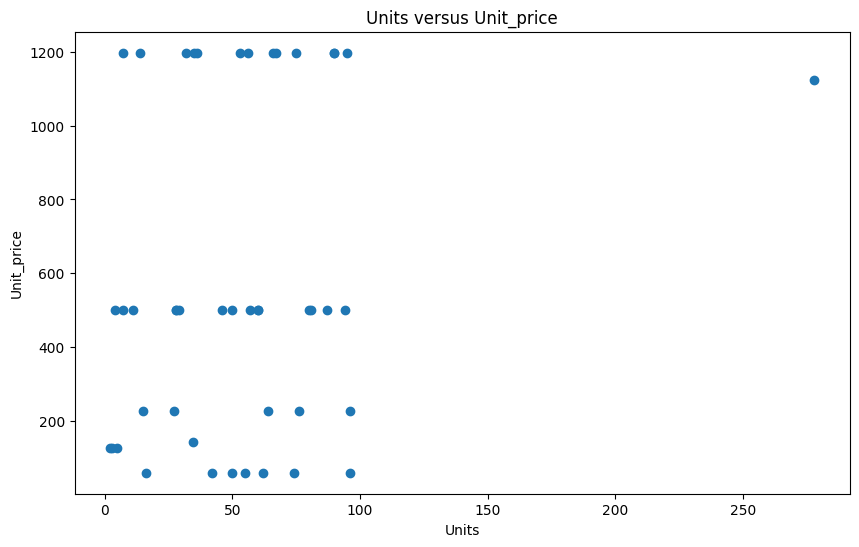

In [83]:
# Create a simple plot using Matplotlib.
df = pd.read_excel('SaleData.xlsx')
print (df.head())
plt.figure(figsize = (10, 6))
plt.scatter(df['Units'], df['Unit_price'])
plt.title('Units versus Unit_price')
plt.xlabel('Units')
plt.ylabel('Unit_price')
plt.show()

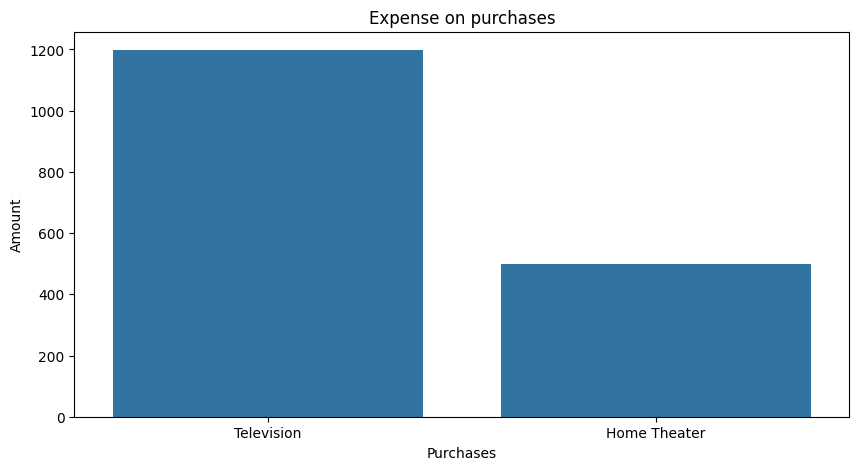

In [89]:
df=df.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='Item', y ='Unit_price', data = df)
plt.title('Expense on purchases')
plt.xlabel('Purchases')
plt.ylabel('Amount')
plt.show()